In [ ]:
# Section A

# question 1
# Pros
# 1. We don’t need to perform any action on our data source so it easy to perform and save time and costs. 
# 2. allow us to know that we are using the most realistic data becouse we are not changing the original data.
# Cons
# 1. can limit our machine learning algorithms to only NaN supported methods becouse NaN not supported by a lot of Python libraries methods.
# 2. can cause data issues for example item price comes as 0 but was interpreted by the algorithm as NaN causing the algorithm to think we don’t have a price for this specific item.

# question 2
'''
The information received can include missing values, wrong values or duplicates, 
so it is necessary to perform preliminary analysis of the data and deside on suitable course of action.
there are 3 main courses of action:
 ● Keep the missing data as it is with NaN values
 ● Delete all rows with missing data from our data source
 ● Replace the missing data with other data we provide (by default / by guessing / by forecasting) 
'''

# question 3
# In case there is no date, you can give the start date of the survey instead of the response date or the average date.
# In case there is no place of residence, you can check the most frequent place of residence in the data and choose it or choose another random place of residence from the list of places of residence of people who answered the survey.
# In case of duplicate data, the record with the most missing values can be deleted.
# In case there is no score, it can be completed according to the most frequent score, median, maximum, minimum or average score.

In [378]:
# Section B
import numpy as np
import pandas as pd
from IPython.display import display

# question 4
data = [
    {"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
    {"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": 20},
    {"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 10},
    {"cust_id": 1, "timestamp": "2024-01-05", "residence": "Tel Aviv", "grade":  None},
    {"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
    {"cust_id": 2, "timestamp": "2024-01-06", "residence": "Jerusalem", "grade": 10},
    {"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
]

# print dataframe
survey_df = pd.DataFrame(data)
print('survey dataframe')
display(survey_df)
print()

# delete duplicates python
seen_ids = set()
unique_customers = []
for item in data:
    if item['cust_id'] not in seen_ids:
        unique_customers.append(item)
        seen_ids.add(item['cust_id'])

unique_customers_df = pd.DataFrame(unique_customers)
display('delete duplicates', unique_customers_df)
print()

# delete null python
customers_no_none = [item for item in data if None not in item.values()]
customers_no_none_df = pd.DataFrame(customers_no_none)
display('delete NaN', customers_no_none_df)
print()

# replace null to average python
grades = [item['grade'] for item in data if item['grade'] is not None]
if grades:
    average_grade = sum(grades) / len(grades)
else:
    average_grade = None

for item in data:
    if item['grade'] is None:
        item['grade'] = average_grade

data_df = pd.DataFrame(data)
display('replace NaN with average grade', data_df)
print()

# delete duplicates pandas
display('delete duplicates', survey_df.drop_duplicates(subset=['cust_id'], keep='first'))
print()

# delete null pandas
display('delete NaN', survey_df.dropna())
print()

# replace null to average pandas
mean_grade = survey_df['grade'].mean()
survey_df['grade'] = survey_df['grade'].fillna(mean_grade)
display('replace NaN with average grade', data_df)
print()

# replace null to average by residence pandas
def fill_missing_grade(row, mean_grades):
    if pd.isna(row['grade']):
        return mean_grades.get(row['residence'])
    return row['grade']

mean_grades = survey_df.groupby('residence')['grade'].mean().to_dict()
survey_df['grade'] = survey_df.apply(lambda row: fill_missing_grade(row, mean_grades), axis=1)
print('replace NaN with average grade by residence')
survey_df

survey dataframe


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
2,1,2024-01-03,Tel Aviv,10.0
3,1,2024-01-05,Tel Aviv,NaN
4,3,2024-01-04,None,7.0
5,2,2024-01-06,Jerusalem,10.0
6,2,2024-01-02,Jerusalem,NaN


'delete duplicates'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8
1,2,2024-01-02,Jerusalem,20
2,3,2024-01-04,None,7


'delete NaN'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8
1,2,2024-01-02,Jerusalem,20
2,1,2024-01-03,Tel Aviv,10
3,2,2024-01-06,Jerusalem,10


'replace NaN with average grade'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
2,1,2024-01-03,Tel Aviv,10.0
3,1,2024-01-05,Tel Aviv,11.0
4,3,2024-01-04,None,7.0
5,2,2024-01-06,Jerusalem,10.0
6,2,2024-01-02,Jerusalem,11.0


'delete duplicates'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
4,3,2024-01-04,None,7.0


'delete NaN'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
2,1,2024-01-03,Tel Aviv,10.0
5,2,2024-01-06,Jerusalem,10.0


'replace NaN with average grade'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
2,1,2024-01-03,Tel Aviv,10.0
3,1,2024-01-05,Tel Aviv,11.0
4,3,2024-01-04,None,7.0
5,2,2024-01-06,Jerusalem,10.0
6,2,2024-01-02,Jerusalem,11.0



replace NaN with average grade by residence


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,20.0
2,1,2024-01-03,Tel Aviv,10.0
3,1,2024-01-05,Tel Aviv,11.0
4,3,2024-01-04,None,7.0
5,2,2024-01-06,Jerusalem,10.0
6,2,2024-01-02,Jerusalem,11.0


In [420]:
# Section C

# question 5
print('5.')
items_df = pd.read_csv('items.csv')
customers_df = pd.read_csv('customers.csv')
order_item_df = pd.read_csv('order_item.csv')
orders_df = pd.read_csv('orders.csv')

combined_df = [items_df, customers_df, order_item_df, orders_df]

for item in combined_df:
    print('dataframe info')
    display(item.info())
    print()

print('###############################################################################################################################################\n')
  
for item in combined_df:
    print('dataframe description')
    display(item.describe().transpose())
    print()

print('###############################################################################################################################################\n')
  
for item in combined_df:
    print('dataframe five first raws')
    display(item.head())
    print()

print('###############################################################################################################################################\n')

# question 6
print('6.')
dup_items = items_df[items_df['item_name'].duplicated(keep=False)].sort_values(['item_name', 'id'])
print('duplicate items')
display(dup_items)
print()

dup_items['non_nan_count'] = dup_items.notna().sum(axis=1)
dup_items.sort_values(['item_name', 'non_nan_count'], inplace=True, ascending=[True, False])
print('number of non NaN values for each row in duplicate item')
display(dup_items)
print()

# also keep the removed items
kept = dup_items.drop_duplicates(subset=['item_name'], keep='first')
display('the kept', kept)
print()

# remove from dup_items all rows not belonging to kept
removed = dup_items[~dup_items['id'].isin(kept['id'])]
display('the removed', removed)
print()

items_df.sort_values(['id'], inplace=True, ascending=True)
items_df = items_df[~items_df['id'].isin(removed['id'])]
display('items_df', items_df)

print('###############################################################################################################################################\n')

# question 7
print('7.')
order_item_df.sort_values('item_id', inplace=True)
print('kept', kept['id'].values)
print('removed', removed['id'].values)

merged_dup = removed.merge(kept, how='inner', on='item_name', suffixes=('_removed', '_kept'))
display(merged_dup)
mapping_delete = dict(zip(merged_dup['id_removed'], merged_dup['id_kept']))
print()
display(mapping_delete)

order_item_df['item_id'] = order_item_df['item_id'].replace(mapping_delete)
print()
pd.set_option('display.max_rows', None)
display('after replacment of the id', order_item_df)
pd.reset_option('display.max_rows')

print('###############################################################################################################################################\n')

# question 8
print('8.')
removed_customers = customers_df[customers_df.isna().sum(axis=1) > 2]
customers_df = customers_df.dropna(thresh=customers_df.shape[1] - 2)
display(customers_df)
print('removed_customers')
display(removed_customers)

print('###############################################################################################################################################\n')

# question 9
print('9.')
orders_removed_df = orders_df[orders_df['customer_id'].isin(removed_customers['id'])]
order_item_df = order_item_df[~order_item_df['order_id'].isin(orders_removed_df['order_id'])]
display(order_item_df)

5.
dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     int64  
 1   item_name          50 non-null     object 
 2   item_category      39 non-null     object 
 3   item_price         50 non-null     float64
 4   stock_quantity     45 non-null     float64
 5   item_brand         42 non-null     object 
 6   item_availability  50 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 2.5+ KB


None


dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   first_name    494 non-null    object 
 2   last_name     494 non-null    object 
 3   gender        447 non-null    object 
 4   age           475 non-null    float64
 5   nationallity  494 non-null    object 
 6   joining_date  439 non-null    object 
 7   phone_number  500 non-null    object 
 8   email         500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


None


dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1000 non-null   int64  
 1   order_id  1000 non-null   int64  
 2   item_id   960 non-null    float64
 3   quantity  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


None


dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  600 non-null    int64  
 1   customer_id               555 non-null    float64
 2   delivery_address          600 non-null    object 
 3   delivery_days             525 non-null    float64
 4   order_date                600 non-null    object 
 5   payment_method            600 non-null    object 
 6   order_source              600 non-null    object 
 7   is_exist_in_order_item    600 non-null    int64  
 8   quantity_per_order        600 non-null    int64  
 9   unique_customer_id        323 non-null    float64
 10  total_items_per_customer  323 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 51.7+ KB


None


###############################################################################################################################################

dataframe description


,count,mean,std,min,25%,50%,75%,max
id,50.0,25.500000,14.577380,1.00,13.25,25.50,37.75,50.00
item_price,50.0,2222.082600,1394.005145,241.54,1004.36,1956.22,3436.83,4471.27
stock_quantity,45.0,743.155556,332.855071,14.00,550.00,704.00,971.00,1367.00



dataframe description


,count,mean,std,min,25%,50%,75%,max
id,500.0,250.500000,144.481833,1.0,125.75,250.5,375.25,500.0
age,475.0,44.006316,14.813395,2.0,34.00,44.0,55.00,84.0



dataframe description


,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500000,288.819436,1.0,250.75,500.5,750.25,1000.0
order_id,1000.0,305.006000,171.251432,1.0,157.00,315.0,450.00,599.0
item_id,960.0,25.746875,14.676686,1.0,13.00,26.0,38.00,50.0
quantity,1000.0,3.016000,2.288882,1.0,1.00,2.0,4.00,9.0



dataframe description


,count,mean,std,min,25%,50%,75%,max
order_id,600.0,300.500000,173.349358,1.0,150.75,300.5,450.25,600.0
customer_id,555.0,258.650450,146.002993,1.0,136.00,256.0,385.00,500.0
delivery_days,525.0,3.899048,1.075091,1.0,3.00,4.0,5.00,6.0
is_exist_in_order_item,600.0,0.738333,0.439909,0.0,0.00,1.0,1.00,1.0
quantity_per_order,600.0,5.026667,5.417090,0.0,0.00,3.0,8.00,33.0
unique_customer_id,323.0,253.665635,145.789582,1.0,128.50,249.0,383.50,500.0
total_items_per_customer,323.0,8.786378,8.923808,0.0,2.00,6.0,13.50,45.0



###############################################################################################################################################

dataframe five first raws


,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True



dataframe five first raws


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org



dataframe five first raws


,id,order_id,item_id,quantity
0,1,337,10.0,2
1,2,430,27.0,6
2,3,430,36.0,2
3,4,508,46.0,1
4,5,229,27.0,2



dataframe five first raws


,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,is_exist_in_order_item,quantity_per_order,unique_customer_id,total_items_per_customer
0,1,477.0,576 Cordelia Place,2.0,05/12/2023,GIFT_CARD,WEBSITE,1,5,477.0,20.0
1,2,93.0,4664 6th Drive,4.0,17/08/2023,CASH,STORE,1,3,93.0,4.0
2,3,474.0,8766 4th Point,4.0,25/02/2023,CHECK,STORE,1,4,474.0,9.0
3,4,333.0,31 Bonner Way,3.0,04/02/2023,CASH,STORE,1,1,333.0,1.0
4,5,436.0,20352 Shelley Way,5.0,01/06/2023,CASH,STORE,1,25,436.0,29.0



###############################################################################################################################################

6.
duplicate items


,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
6,28,Camera,NaN,695.71,NaN,Sony,False
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True
13,10,Drone,Televisions and Displays,453.85,605.0,NaN,True
12,16,Drone,NaN,3949.97,850.0,NaN,True
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True
18,8,Headphone,NaN,3117.19,599.0,NaN,True
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False



number of non NaN values for each row in duplicate item


,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,non_nan_count
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
13,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6
12,16,Drone,NaN,3949.97,850.0,NaN,True,5
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False,6
18,8,Headphone,NaN,3117.19,599.0,NaN,True,5


'the kept'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,non_nan_count
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False,6
21,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True,7
29,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True,7
31,17,Smart Watch,Televisions and Displays,312.88,685.0,Canon,True,7
33,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True,7
36,50,Speaker,Audio Equipment,4453.90,937.0,Logitech,True,7
39,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,7


'the removed'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,non_nan_count
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7
13,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6
12,16,Drone,NaN,3949.97,850.0,NaN,True,5
18,8,Headphone,NaN,3117.19,599.0,NaN,True,5
22,43,Laptop,Computers and Accessories,4153.61,1018.0,Dell,True,7
30,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True,7
32,14,Smart Watch,NaN,2007.43,742.0,NaN,True,5
34,45,Smartphone,Mobile Devices and Accessories,3513.56,1162.0,Panasonic,True,7


'items_df'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
40,1,Television,Televisions and Displays,356.81,1009.0,JBL,True
21,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
33,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True
29,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
45,12,Video Game Console,Gaming Equipment,689.61,753.0,Microsoft,True
44,13,Video Game,NaN,1890.03,681.0,Lenovo,True
15,15,Fitness Tracker,Mobile Devices and Accessories,2997.29,956.0,Apple,True


###############################################################################################################################################

7.
kept [ 7  3 24 49  2  6 17  4 50 46  1]
removed [48 28 44 10 16  8 43 47 14 45  9  5 40 42]


,id_removed,item_name,item_category_removed,item_price_removed,stock_quantity_removed,item_brand_removed,item_availability_removed,non_nan_count_removed,id_kept,item_category_kept,item_price_kept,stock_quantity_kept,item_brand_kept,item_availability_kept,non_nan_count_kept
0,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7,7,Photography Equipment,2366.72,458.0,Microsoft,True,7
1,28,Camera,NaN,695.71,NaN,Sony,False,5,7,Photography Equipment,2366.72,458.0,Microsoft,True,7
2,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7,3,Computers and Accessories,1121.84,334.0,HP,True,7
3,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6,24,Televisions and Displays,4449.99,443.0,Samsung,True,7
4,16,Drone,NaN,3949.97,850.0,NaN,True,5,24,Televisions and Displays,4449.99,443.0,Samsung,True,7
5,8,Headphone,NaN,3117.19,599.0,NaN,True,5,49,Audio Equipment,1317.56,NaN,Sony,False,6
6,43,Laptop,Computers and Accessories,4153.61,1018.0,Dell,True,7,2,Computers and Accessories,1851.32,493.0,HP,True,7
7,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True,7,6,Printers and Office Equipment,4175.99,971.0,Sony,True,7
8,14,Smart Watch,NaN,2007.43,742.0,NaN,True,5,17,Televisions and Displays,312.88,685.0,Canon,True,7
9,45,Smartphone,Mobile Devices and Accessories,3513.56,1162.0,Panasonic,True,7,4,Mobile Devices and Accessories,965.20,201.0,Bose,True,7


{48: 7,
 28: 7,
 44: 3,
 10: 24,
 16: 24,
 8: 49,
 43: 2,
 47: 6,
 14: 17,
 45: 4,
 9: 50,
 5: 46,
 40: 1,
 42: 1}

'after replacment of the id'

,id,order_id,item_id,quantity
498,499,384,1.0,1
274,275,512,1.0,2
853,854,383,1.0,7
74,75,201,1.0,4
414,415,396,1.0,1
830,831,224,1.0,9
467,468,514,1.0,1
913,914,565,1.0,1
482,483,113,1.0,7
486,487,5,1.0,6


###############################################################################################################################################

8.


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


removed_customers


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
25,26,NaN,NaN,Female,32.0,NaN,09/06/2022,679-526-4011,abirdwhistellp@parallels.com
98,99,NaN,NaN,Male,37.0,NaN,27/09/2022,790-382-0727,cgourley2q@seattletimes.com
118,119,NaN,NaN,Non-binary,61.0,NaN,26/12/2022,710-506-3463,mdalliston3a@baidu.com
122,123,NaN,NaN,Male,25.0,NaN,09/11/2022,822-599-2209,rmellows3e@comsenz.com
125,126,NaN,NaN,Genderqueer,44.0,NaN,11/03/2021,599-535-4354,dmceniry3h@myspace.com
301,302,NaN,NaN,Female,76.0,NaN,19/05/2022,677-451-0291,bhedney8d@unblog.fr


###############################################################################################################################################

9.


,id,order_id,item_id,quantity
498,499,384,1.0,1
274,275,512,1.0,2
853,854,383,1.0,7
74,75,201,1.0,4
414,415,396,1.0,1
...,...,...,...,...
901,902,52,NaN,8
905,906,430,NaN,4
920,921,56,NaN,2
930,931,342,NaN,6


In [426]:
# Section D
items_df = pd.read_csv('items.csv')
customers_df = pd.read_csv('customers.csv')
order_item_df = pd.read_csv('order_item.csv')
orders_df = pd.read_csv('orders.csv')

# question 1
print('1.')
print('avg_price:', items_df['item_price'].mean())
print()

# question 2
print('2.')
orders_df.dropna(subset=['customer_id'], inplace=True)
order_item_df.dropna(subset=['item_id'], inplace=True)
customers_df.dropna(subset=['first_name'], inplace=True)

merged = orders_df.merge(order_item_df, how='inner', on='order_id').merge(customers_df, how='inner', left_on='customer_id', right_on='id')
customer_purchase_totals = merged.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)
top_customer_id = customer_purchase_totals.idxmax()
top_customer_details = customers_df[customers_df['id'] == top_customer_id]
print("Customer who bought the most products:")
display(top_customer_details)
print()

# question 3
print('3.')
merged_order_item_df = order_item_df.merge(items_df, how='inner', left_on='item_id', right_on='id')
merged_order_item_df['price_total'] = merged_order_item_df.apply(lambda row: row['item_price'] * row['quantity'], axis=1)
display(merged_order_item_df)
print()

# question 4
print('4.')
display(merged_order_item_df.groupby('order_id')['price_total'].sum().sort_values(ascending=False))
print()

# question 5
print('5.')
order_totals = merged_order_item_df.groupby('order_id')['price_total'].sum()

max_total_price = order_totals.max()
most_expensive_orders = order_totals[order_totals == max_total_price]
print('most expensive orders:')
display(most_expensive_orders)
print()

min_total_price = order_totals.min()
least_expensive_orders = order_totals[order_totals == min_total_price]
print('least expensive orders:')
display(least_expensive_orders)
print()

average_orders_price = order_totals.mean()
print('average orders price:')
display(average_orders_price)
print()

# question 6
print('6.')
pivot = pd.pivot_table(customers_df, index='nationallity' ,columns='gender', values='id' , aggfunc='count').fillna(0)
pivot

1.
avg_price: 2222.0825999999997

2.
Customer who bought the most products:


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
58,59,Merill,Lacroutz,Male,40.0,Isreal,11/04/2022,988-997-5910,mlacroutz1m@ft.com



3.


,id_x,order_id,item_id,quantity,id_y,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,price_total
0,1,337,10.0,2,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,907.70
1,2,430,27.0,6,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7703.94
2,3,430,36.0,2,36,Modem,NaN,3256.88,673.0,Bose,True,6513.76
3,4,508,46.0,1,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,1606.65
4,5,229,27.0,2,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,2567.98
...,...,...,...,...,...,...,...,...,...,...,...,...
955,996,594,24.0,2,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,8899.98
956,997,330,32.0,8,32,Portable Charger,Mobile Devices and Accessories,1523.27,192.0,HP,True,12186.16
957,998,472,10.0,3,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,1361.55
958,999,222,29.0,1,29,Webcam,Printers and Office Equipment,4227.36,596.0,Dell,True,4227.36



4.


order_id
484    81267.68
367    70574.81
335    69719.42
24     69581.82
571    67586.95
         ...   
574      417.16
514      356.81
192      312.88
306      241.54
451      241.54
Name: price_total, Length: 436, dtype: float64


5.
most expensive orders:


order_id
484    81267.68
Name: price_total, dtype: float64


least expensive orders:


order_id
306    241.54
451    241.54
Name: price_total, dtype: float64


average orders price:


14814.50639908257


6.


gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1.0,0.0,10.0,1.0,0.0,9.0,0.0,1.0
Brazil,0.0,0.0,6.0,0.0,0.0,17.0,2.0,1.0
Chile,1.0,0.0,14.0,0.0,0.0,9.0,0.0,0.0
China,0.0,0.0,5.0,1.0,1.0,9.0,0.0,1.0
France,1.0,0.0,15.0,1.0,0.0,10.0,0.0,0.0
Germany,0.0,0.0,12.0,0.0,0.0,3.0,0.0,1.0
India,1.0,0.0,8.0,0.0,0.0,15.0,0.0,0.0
Isreal,2.0,1.0,20.0,5.0,1.0,31.0,0.0,2.0
Italy,0.0,0.0,15.0,0.0,2.0,11.0,0.0,0.0


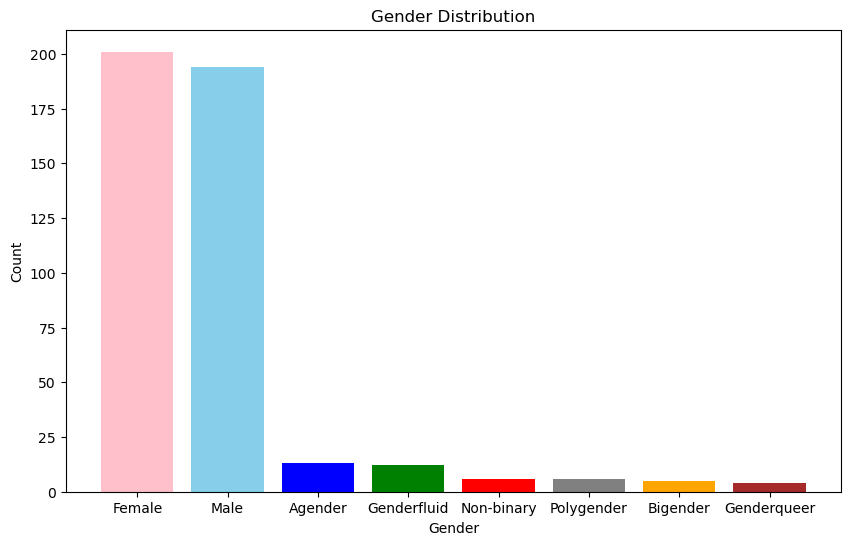

###############################################################################################################################################



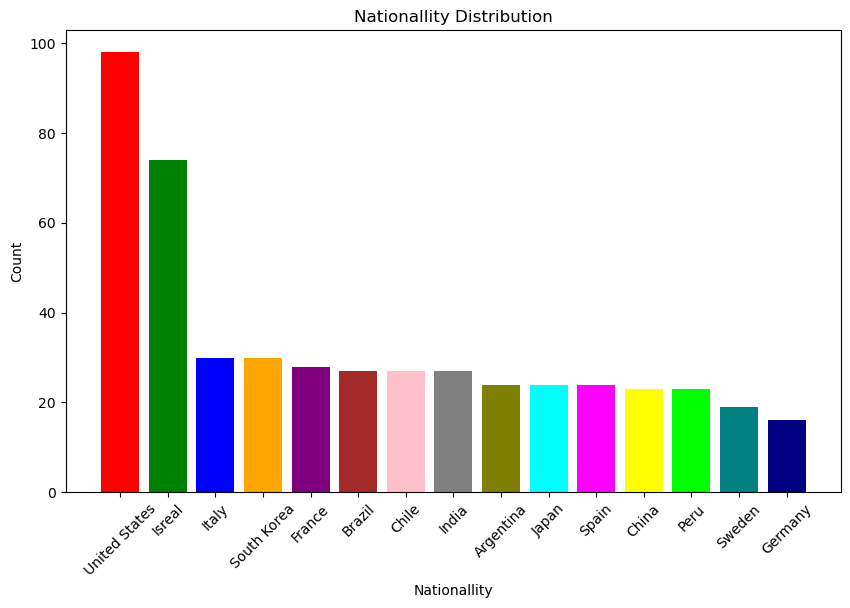

###############################################################################################################################################



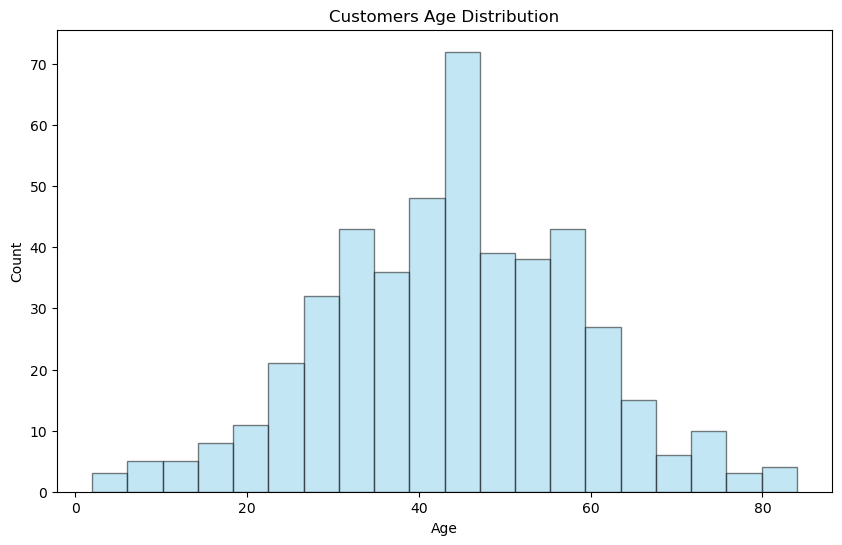

###############################################################################################################################################



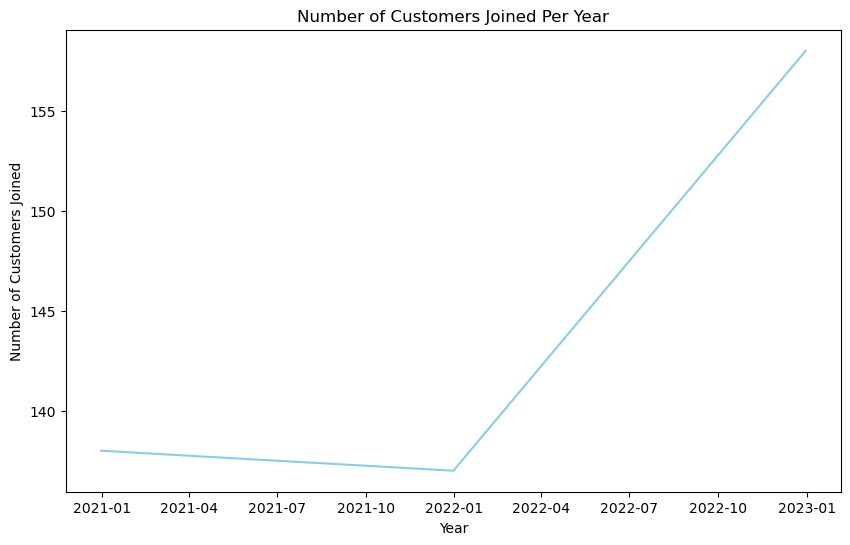

###############################################################################################################################################



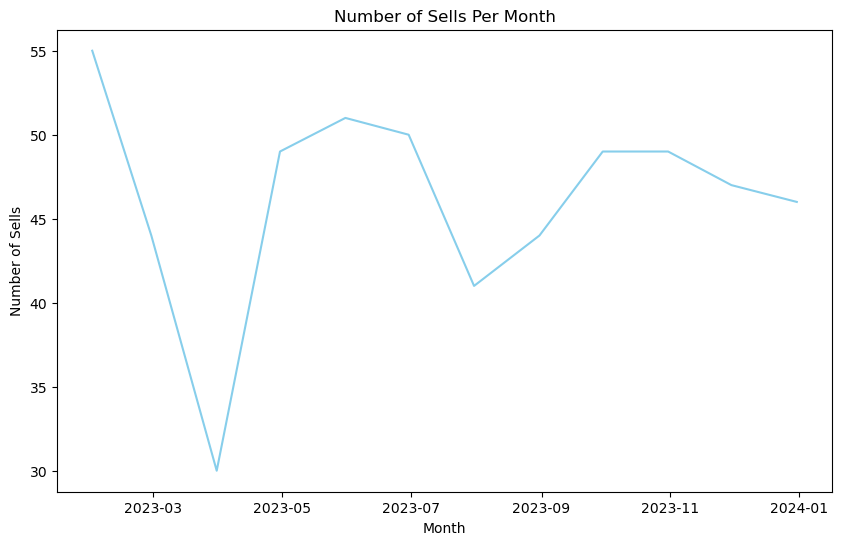

###############################################################################################################################################



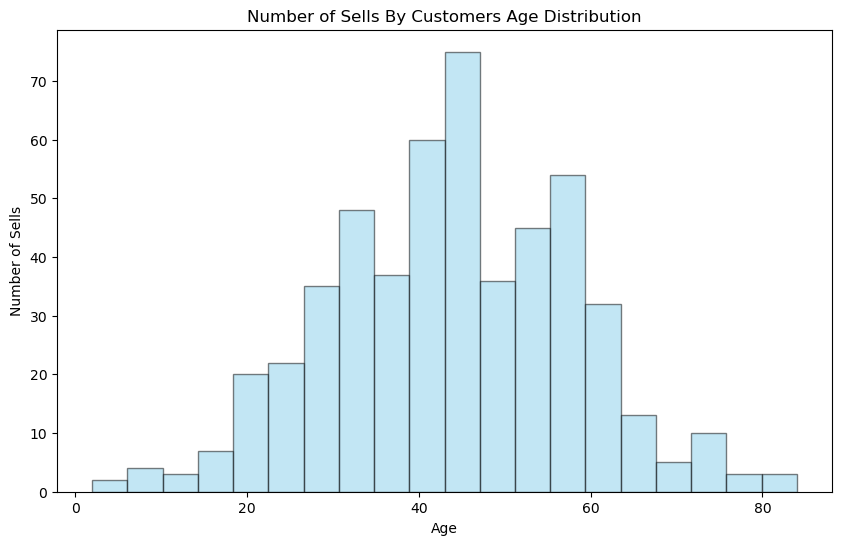

It can be seen that people between the ages of 40 and 45 buy the most, It makes sense that people of these ages with children at home will have higher expenses than younger and older people
###############################################################################################################################################



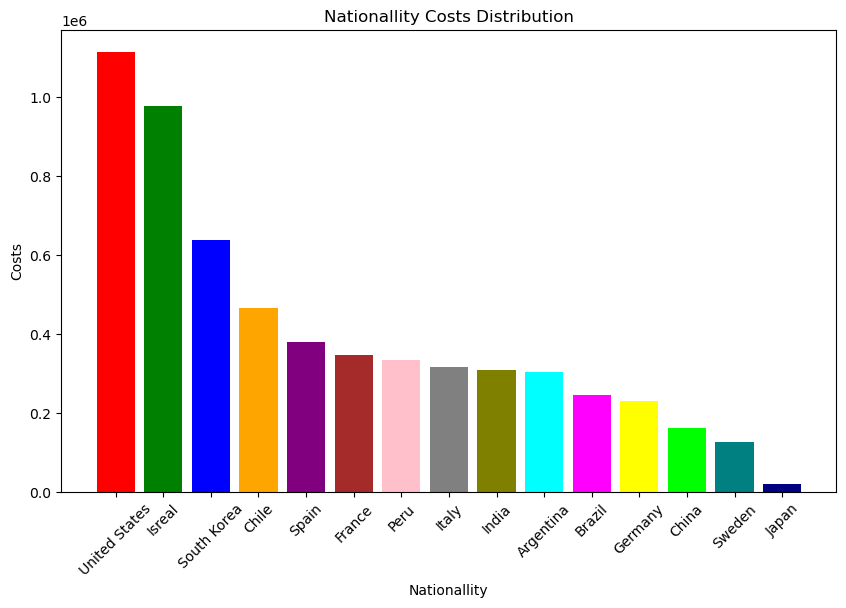

In [380]:
# Section D Graphs
import matplotlib.pyplot as plt

# question 1
gender_counts = customers_df.groupby('gender')['gender'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values, color = ['pink', 'skyblue', 'blue', 'green', 'red', 'gray', 'orange', 'brown'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

print('###############################################################################################################################################\n')

# question 2
nationallity_counts = customers_df.groupby('nationallity')['nationallity'].count().sort_values(ascending=False)

colors = [
    'red', 'green', 'blue', 'orange', 'purple',
    'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'navy'
]

plt.figure(figsize=(10, 6))
plt.bar(nationallity_counts.index, nationallity_counts.values, color =colors)
plt.title("Nationallity Distribution")
plt.xticks(rotation=45)
plt.xlabel("Nationallity")
plt.ylabel("Count")

plt.show()

print('###############################################################################################################################################\n')

# question 3
plt.figure(figsize=(10, 6))
plt.hist(customers_df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.5)

plt.title('Customers Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

print('###############################################################################################################################################\n')

# question 4
customers_graph_df = customers_df.copy()
customers_graph_df['joining_date'] = pd.to_datetime(customers_graph_df['joining_date'], format='%d/%m/%Y')

customers_graph_df = customers_graph_df.dropna(subset=['joining_date'])
customers_graph_df = customers_graph_df.set_index('joining_date')
customers_graph_df = customers_graph_df.resample(rule='YE').size()

plt.figure(figsize=(10, 6))
plt.plot(customers_graph_df.index, customers_graph_df.values,  color='skyblue')
plt.title('Number of Customers Joined Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers Joined')

plt.show()

print('###############################################################################################################################################\n')

# question 5
orders_graph_df = orders_df.copy()
orders_graph_df['order_date'] = pd.to_datetime(orders_graph_df['order_date'], errors='coerce')

orders_graph_df = orders_graph_df.dropna(subset=['order_date'])
orders_graph_df = orders_graph_df.set_index('order_date')
orders_graph_df = orders_graph_df.resample(rule='ME').size()

plt.figure(figsize=(10, 6))
plt.plot(orders_graph_df.index, orders_graph_df.values,  color='skyblue')
plt.title('Number of Sells Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sells')

plt.show()

print('###############################################################################################################################################\n')

# question 6
merged_order_customers_df = orders_df.merge(customers_df, how='inner', left_on='customer_id', right_on='id')

plt.figure(figsize=(10, 6))
plt.hist(merged_order_customers_df ['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.5)

plt.title('Number of Sells By Customers Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Sells')

plt.show()
print('It can be seen that people between the ages of 40 and 45 buy the most, It makes sense that people of these ages with children at home will have higher expenses than younger and older people')

print('###############################################################################################################################################\n')

# question 7
merged_by_nationallity_df = merged_order_item_df.merge(orders_df, how='inner', on='order_id').merge(customers_df, how='inner', left_on='customer_id', right_on='id')
cost_by_nationallity = merged_by_nationallity_df.groupby('nationallity')['price_total'].sum().sort_values(ascending=False)

colors = [
    'red', 'green', 'blue', 'orange', 'purple',
    'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'navy'
]

plt.figure(figsize=(10, 6))
plt.bar(cost_by_nationallity.index, cost_by_nationallity.values, color =colors)
plt.title("Nationallity Costs Distribution")
plt.xticks(rotation=45)
plt.xlabel("Nationallity")
plt.ylabel("Costs")

plt.show()